# Customer Loan Approval Classification Model

## Introduction:
Low model performance of Dummy Bank in customer loan approval due to high volume of bad loans. <br>

## Dataset: 
This project utilizes the dataset of a dummy bank generated from the Kaggle website (https://www.kaggle.com/datasets/mrferozi/loan-data-for-dummy-bank?select=loan_final313.csv).

## Objective: 
1) Improve the Customer Loan Approval Classification Model of Dummy Bank.

## Data Mining Algo: 
1) Classification using Pycaret Library with SHAP for Model Understanding <br>

<a id='back-to-top'></a>
## CONTENT SUMMARY
1) [Importing the libraries](#import-lib) <br>
2) [Loading the data](#read-file) <br>
3) [Initial EDA + Initial Pre-processing](#eda-preprocess) <br>
4) [AutoViz](#autoviz) <br>
5) [Data Transformation](#data-transform) <br>
6) [Clustering](#clustering) <br>
7) [Understanding the Clusters](#understand-cluster) <br>
8) [Conclusion](#conclusion) <br>

<a id='import-lib'></a>
### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import kneed

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
#from sklearn import metrics
from yellowbrick.cluster import silhouette_visualizer
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
import shap
#import pycaret

<a id='read-file'></a>
### Loading the data
[Back to top](#back-to-top) <br>

In [2]:
path = "C:/Users/Laurence PC/Documents/TIP/1st Year 2nd Sem/Data Viz/Potential Project/loan_final313.csv"
df = pd.read_csv(path)
df.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


<a id='eda-preprocess'></a>
### Initial EDA + Initial Data Pre-processing
Data needs to undergo iterations of pre-processing and EDA. As such, the following shall be implemented:

1. Getting the list of columns and the original shape of dataframe
2. Describing the statistical summary of numeric columns 
3. Checking for columns with unique values
4. Checking for NA and NAN values
5. Removing BLANK Rows, REDUNDANT and UNUSABLE Columns
6. Changing data types
7. Treating columns with ordinal values

[Back to top](#back-to-top) <br>

In [3]:
df.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')

In [4]:
df.shape #give the rows and columns

(887379, 30)

In [5]:
df.describe()

,id,year,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
count,8.873790e+05,887379.000000,8.873790e+05,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,3.246513e+07,2014.021761,1.047089e+06,6.050564,2.099130,7.502759e+04,1.196702,14755.264605,1.300045,1.000576,4.874621,1.475629,0.075987,13.246740,2.798403,18.157039,7558.826684,5757.706424,45.919243,436.717127
std,2.282734e+07,1.261741,4.555149e+04,3.507405,0.944839,6.469815e+04,0.442542,8435.455601,0.458278,0.023990,2.381156,0.499406,0.264977,4.381867,1.312599,17.190626,7871.243336,6625.441046,409.693874,244.186593
min,5.473400e+04,2007.000000,1.012008e+06,0.500000,1.000000,0.000000e+00,1.000000,500.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.320000,1.000000,0.000000,0.000000,0.000000,0.000000,15.670000
25%,9.206643e+06,2013.000000,1.012016e+06,3.000000,1.000000,4.500000e+04,1.000000,8000.000000,1.000000,1.000000,3.000000,1.000000,0.000000,9.990000,2.000000,11.910000,1914.590000,1200.570000,0.000000,260.705000
50%,3.443327e+07,2014.000000,1.012016e+06,6.050000,3.000000,6.500000e+04,1.000000,13000.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12.990000,3.000000,17.650000,4894.999117,3215.320000,0.000000,382.550000
75%,5.490814e+07,2015.000000,1.092015e+06,10.000000,3.000000,9.000000e+04,1.000000,20000.000000,2.000000,1.000000,6.000000,2.000000,0.000000,16.200000,4.000000,23.950000,10616.814230,8000.000000,0.000000,572.600000
max,6.861706e+07,2015.000000,1.122015e+06,10.000000,6.000000,9.500000e+06,3.000000,35000.000000,2.000000,2.000000,14.000000,2.000000,1.000000,28.990000,7.000000,9999.000000,57777.579870,35000.030000,33520.270000,1445.460000


In [6]:
list(df.columns)

['id',
 'year',
 'issue_d',
 'final_d',
 'emp_length_int',
 'home_ownership',
 'home_ownership_cat',
 'income_category',
 'annual_inc',
 'income_cat',
 'loan_amount',
 'term',
 'term_cat',
 'application_type',
 'application_type_cat',
 'purpose',
 'purpose_cat',
 'interest_payments',
 'interest_payment_cat',
 'loan_condition',
 'loan_condition_cat',
 'interest_rate',
 'grade',
 'grade_cat',
 'dti',
 'total_pymnt',
 'total_rec_prncp',
 'recoveries',
 'installment',
 'region']

In [7]:
df.nunique() == 0

id                      False
year                    False
issue_d                 False
final_d                 False
emp_length_int          False
home_ownership          False
home_ownership_cat      False
income_category         False
annual_inc              False
income_cat              False
loan_amount             False
term                    False
term_cat                False
application_type        False
application_type_cat    False
purpose                 False
purpose_cat             False
interest_payments       False
interest_payment_cat    False
loan_condition          False
loan_condition_cat      False
interest_rate           False
grade                   False
grade_cat               False
dti                     False
total_pymnt             False
total_rec_prncp         False
recoveries              False
installment             False
region                  False
dtype: bool

In [8]:
df.info()
#df.notnull().sum()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    887379 non-null  int64  
 1   year                  887379 non-null  int64  
 2   issue_d               887379 non-null  object 
 3   final_d               887379 non-null  int64  
 4   emp_length_int        887379 non-null  float64
 5   home_ownership        887379 non-null  object 
 6   home_ownership_cat    887379 non-null  int64  
 7   income_category       887379 non-null  object 
 8   annual_inc            887379 non-null  int64  
 9   income_cat            887379 non-null  int64  
 10  loan_amount           887379 non-null  int64  
 11  term                  887379 non-null  object 
 12  term_cat              887379 non-null  int64  
 13  application_type      887379 non-null  object 
 14  application_type_cat  887379 non-null  int64  
 15  

In [9]:
#CHECKING FOR NA/NAN VALUES
#for col in df:
#    print(col)
#    print(df[col].value_counts(dropna=False),end="\n")

In [10]:
#REMOVING REDUNDANT, BLANK Rows, and UNUSABLE Columns
df = df.drop(columns=['id','issue_d','final_d']) #unusable columns
df = df.drop(columns=['home_ownership_cat','income_cat','income_category','term'
                      ,'application_type','application_type_cat','purpose_cat','interest_payments','interest_payment_cat'
                      ,'loan_condition','grade','grade_cat','total_pymnt','total_rec_prncp']) #redundant columns
df = df.drop(columns=['recoveries']) #only bad loans have recoveries, not ideal feature as it highly correlated to the y variable 
df = df.drop(columns=['installment']) #redundant to terms and total principal

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                887379 non-null  int64  
 1   emp_length_int      887379 non-null  float64
 2   home_ownership      887379 non-null  object 
 3   annual_inc          887379 non-null  int64  
 4   loan_amount         887379 non-null  int64  
 5   term_cat            887379 non-null  int64  
 6   purpose             887379 non-null  object 
 7   loan_condition_cat  887379 non-null  int64  
 8   interest_rate       887379 non-null  float64
 9   dti                 887379 non-null  float64
 10  region              887379 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 74.5+ MB


In [12]:
# ORDINAL VALUES
#Age_Range_dict = {'0 to 9 years': 1,'10 to 19 years': 2,'20 to 24 years': 3,'25 to 34 years': 4,'35 to 44 years': 5,'45 to 54 years': 6,'55 to 59 years': 7, '60 to 64 years': 8,'65 to 74 years': 9,'75 years and over':10}
#df['Age Range_Ordinal'] = df['Age Range'].map(Age_Range_dict)
#df = df.drop(columns=['Year Patron Registered','Age Range'])

<a id='autoviz'></a>
### Autoviz
[Back to top](#back-to-top) <br>

In [ ]:
sweet_report = sv.analyze(df)
#Saving results to HTML file
sweet_report.show_html('Dummy_Bank_sweet_report_v2.html')

<a id='data-transform'></a>
### Data Transformation
After the data has completed the pre-processing and EDA stage, the following data transformation will be performed:

1. Encoding Categorical Variables 
2. Feature Scaling

[Back to top](#back-to-top) <br>

In [13]:
#COPYING ORIGINAL VALUES BEFORE TRANSFORMATIONS
df_orig = df.copy()
df_orig.reset_index(drop=True, inplace=True)
df_orig

,year,emp_length_int,home_ownership,annual_inc,loan_amount,term_cat,purpose,loan_condition_cat,interest_rate,dti,region
0,2011,10.0,RENT,24000,5000,1,credit_card,0,10.65,27.65,munster
1,2011,0.5,RENT,30000,2500,2,car,1,15.27,1.00,leinster
2,2011,10.0,RENT,12252,2400,1,small_business,0,15.96,8.72,cannught
3,2011,10.0,RENT,49200,10000,1,other,0,13.49,20.00,ulster
4,2011,1.0,RENT,80000,3000,2,other,0,12.69,17.94,ulster
...,...,...,...,...,...,...,...,...,...,...,...
887374,2015,8.0,RENT,31000,10000,1,debt_consolidation,0,11.99,28.69,ulster
887375,2015,10.0,MORTGAGE,79000,24000,1,home_improvement,0,11.99,3.90,Northern-Irl
887376,2015,5.0,RENT,35000,13000,2,debt_consolidation,0,15.99,30.90,leinster
887377,2015,1.0,RENT,64400,12000,2,debt_consolidation,0,19.99,27.19,Northern-Irl


In [14]:
categorical = df.select_dtypes(include=['object'])
categorical_cols = list(categorical.columns)
categorical.shape

(887379, 3)

In [15]:
for col in categorical:
    print(col)
    print(df[col].unique(),end="\n")

home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
purpose
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
region
['munster' 'leinster' 'cannught' 'ulster' 'Northern-Irl']


In [16]:
# Treating Categorical Variables
#dummies = pd.get_dummies(df, columns=categorical, drop_first=True)
#embarked_dummies = pd.get_dummies(df., prefix='Embarked')
#df3 = df.copy()
df = pd.get_dummies(df, columns=categorical_cols)

In [17]:
df

,year,emp_length_int,annual_inc,loan_amount,term_cat,loan_condition_cat,interest_rate,dti,home_ownership_ANY,home_ownership_MORTGAGE,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,region_Northern-Irl,region_cannught,region_leinster,region_munster,region_ulster
0,2011,10.0,24000,5000,1,0,10.65,27.65,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2011,0.5,30000,2500,2,1,15.27,1.00,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2011,10.0,12252,2400,1,0,15.96,8.72,0,0,...,0,0,1,0,0,0,1,0,0,0
3,2011,10.0,49200,10000,1,0,13.49,20.00,0,0,...,1,0,0,0,0,0,0,0,0,1
4,2011,1.0,80000,3000,2,0,12.69,17.94,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,2015,8.0,31000,10000,1,0,11.99,28.69,0,0,...,0,0,0,0,0,0,0,0,0,1
887375,2015,10.0,79000,24000,1,0,11.99,3.90,0,1,...,0,0,0,0,0,1,0,0,0,0
887376,2015,5.0,35000,13000,2,0,15.99,30.90,0,0,...,0,0,0,0,0,0,0,1,0,0
887377,2015,1.0,64400,12000,2,0,19.99,27.19,0,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
df.dtypes

year                            int64
emp_length_int                float64
annual_inc                      int64
loan_amount                     int64
term_cat                        int64
loan_condition_cat              int64
interest_rate                 float64
dti                           float64
home_ownership_ANY              uint8
home_ownership_MORTGAGE         uint8
home_ownership_NONE             uint8
home_ownership_OTHER            uint8
home_ownership_OWN              uint8
home_ownership_RENT             uint8
purpose_car                     uint8
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_house                   uint8
purpose_major_purchase          uint8
purpose_medical                 uint8
purpose_moving                  uint8
purpose_other                   uint8
purpose_renewable_energy        uint8
purpose_small_business          uint8
purpose_vaca

In [19]:
numerical = df.select_dtypes(include=['int32','int64','float64','uint8'])
numerical = numerical.drop(columns=['loan_condition_cat'])
numerical_cols = list(numerical.columns)
numerical.shape

(887379, 32)

In [20]:
#for col in numerical:
#    print(df[col].unique(),end="\n")

In [21]:
#FEATURE SCALING
normalize = MinMaxScaler()
standardize = StandardScaler()

numerical_scaled = normalize.fit_transform(numerical)
#numerical_scaled = standardize.fit_transform(numerical)

#df_standardized = pd.DataFrame(numerical_scaled, columns=[numerical_cols])
#df_normalized = normalize.fit_transform(df_standardized)
#df_normalized = pd.DataFrame(numerical_scaled, columns=[numerical_cols])

#TRANSFORMED DATASET
df_transformed = pd.DataFrame(numerical_scaled, columns=[numerical_cols])

In [22]:
df_transformed['loan_condition_cat'] = df['loan_condition_cat']
df_transformed

,year,emp_length_int,annual_inc,loan_amount,term_cat,interest_rate,dti,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,region_Northern-Irl,region_cannught,region_leinster,region_munster,region_ulster,loan_condition_cat
0,0.5,1.000000,0.002526,0.130435,0.0,0.225180,0.002765,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.5,0.000000,0.003158,0.057971,1.0,0.420363,0.000100,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.5,1.000000,0.001290,0.055072,0.0,0.449514,0.000872,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.5,1.000000,0.005179,0.275362,0.0,0.345163,0.002000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.5,0.052632,0.008421,0.072464,1.0,0.311365,0.001794,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,1.0,0.789474,0.003263,0.275362,0.0,0.281791,0.002869,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
887375,1.0,1.000000,0.008316,0.681159,0.0,0.281791,0.000390,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
887376,1.0,0.473684,0.003684,0.362319,1.0,0.450782,0.003090,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
887377,1.0,0.052632,0.006779,0.333333,1.0,0.619772,0.002719,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [ ]:
#df_transformed.to_excel('DummyBank_DataCleanup.xlsx',index=False)
#df_transformed.to_csv('DummyBank_DataCleanup v3.csv',index=False)

<a id='clustering'></a>
### Model Building (Classification)
[Back to top](#back-to-top) <br>

In [23]:
X = df_transformed.copy()

In [24]:
data = pd.read_csv('DummyBank_DataCleanup v3.csv')
data.head()

,year,emp_length_int,annual_inc,loan_amount,term_cat,interest_rate,dti,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,region_Northern-Irl,region_cannught,region_leinster,region_munster,region_ulster,loan_condition_cat
0,0.5,1.000000,0.002526,0.130435,0.0,0.225180,0.002765,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.5,0.000000,0.003158,0.057971,1.0,0.420363,0.000100,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.5,1.000000,0.001290,0.055072,0.0,0.449514,0.000872,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.5,1.000000,0.005179,0.275362,0.0,0.345163,0.002000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.5,0.052632,0.008421,0.072464,1.0,0.311365,0.001794,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [25]:
#Class Weights Setup
X1 = X.drop(["loan_condition_cat"], axis=1)
y1 = X["loan_condition_cat"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2,random_state=42,stratify=y1)

count_class_1 = y1.value_counts()[0]
count_class_2 = y1.value_counts()[1]
ratio = count_class_1/count_class_2
rf_estimator = RandomForestClassifier(class_weight={1:ratio, 0:1})

dropping on a non-lexsorted multi-index without a level parameter may impact performance.


In [ ]:
#Train the model using the training sets y_pred=clf.predict(X_test)
#rf_estimator.fit(X_train1,y_train1)

# prediction on test set
#prediction=rf_estimator.predict(X_test1)



### Finding the best model thru Pycaret

In [26]:
import pycaret
from pycaret.classification import *
#clf1 = setup(data, target = 'loan_condition_cat', session_id=123, log_experiment=True,data_split_stratify=True ,experiment_name='pycaret laurence',fix_imbalance = True,n_jobs=-6)
clf1 = setup(data, target = 'loan_condition_cat', session_id=123, log_experiment=True,data_split_stratify=True ,experiment_name='pycaret laurence',n_jobs=-6)

,Description,Value
0,Session id,123
1,Target,loan_condition_cat
2,Target type,classification
3,Data shape,"(887379, 33)"
4,Train data shape,"(621165, 33)"
5,Test data shape,"(266214, 33)"
6,Numeric features,32
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


#### Best Metric: Recall to avoid large False Negatives
(we want to avoid incorrectly predicting Bad Loans as Good Loans)

##### Workarounds:
1) Class Weights
2) Threshold Optimization

In [27]:
xgb = create_model('xgboost',probability_threshold=0.1,class_weight={1:ratio, 0:1})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7369,0.7637,0.6320,0.1696,0.2675,0.1677,0.2221
1,0.7423,0.7670,0.6345,0.1733,0.2723,0.1736,0.2280
2,0.7423,0.7727,0.6472,0.1756,0.2763,0.1780,0.2345
3,0.7402,0.7666,0.6398,0.1730,0.2724,0.1735,0.2289
4,0.7402,0.7640,0.6335,0.1718,0.2703,0.1713,0.2257
5,0.7420,0.7628,0.6220,0.1709,0.2681,0.1691,0.2215
6,0.7387,0.7620,0.6305,0.1704,0.2683,0.1689,0.2228
7,0.7391,0.7618,0.6258,0.1698,0.2672,0.1677,0.2209
8,0.7395,0.7643,0.6347,0.1717,0.2703,0.1711,0.2257
9,0.7390,0.7675,0.6345,0.1713,0.2698,0.1705,0.2251


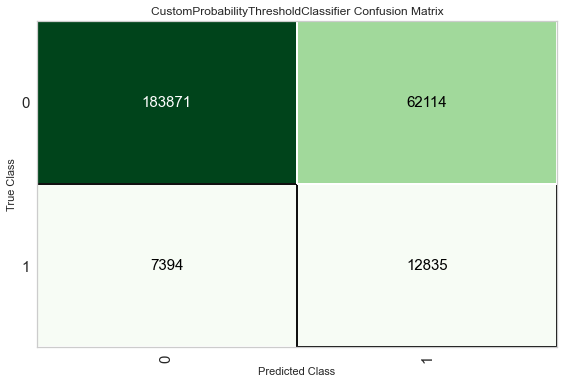

In [28]:
#Visualization
plot_model(xgb, plot = 'confusion_matrix')

In [30]:
rf = create_model('rf',probability_threshold=0.1,class_weight={1:ratio, 0:1})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7226,0.7299,0.5960,0.1551,0.2461,0.1428,0.1917
1,0.7265,0.7260,0.5934,0.1567,0.2479,0.1452,0.1936
2,0.7273,0.7343,0.6038,0.1590,0.2518,0.1495,0.1996
3,0.7252,0.7300,0.6008,0.1574,0.2494,0.1466,0.1963
4,0.7263,0.7282,0.5970,0.1573,0.2490,0.1463,0.1953
5,0.7241,0.7218,0.5809,0.1532,0.2424,0.1388,0.1853
6,0.7240,0.7274,0.5943,0.1555,0.2465,0.1433,0.1920
7,0.7249,0.7222,0.5879,0.1549,0.2452,0.1420,0.1896
8,0.7246,0.7289,0.5956,0.1561,0.2473,0.1443,0.1931
9,0.7269,0.7291,0.5956,0.1573,0.2489,0.1463,0.1951


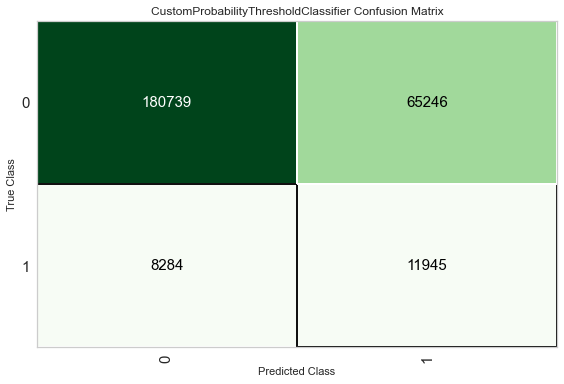

In [31]:
#Visualization
plot_model(rf, plot = 'confusion_matrix')

In [ ]:
blender_custom = blend_models(estimator_list = [rf, xgb],probability_threshold=0.1)

<a id='understand-cluster'></a>
### Understanding the Key Drivers
[Back to top](#back-to-top) <br>

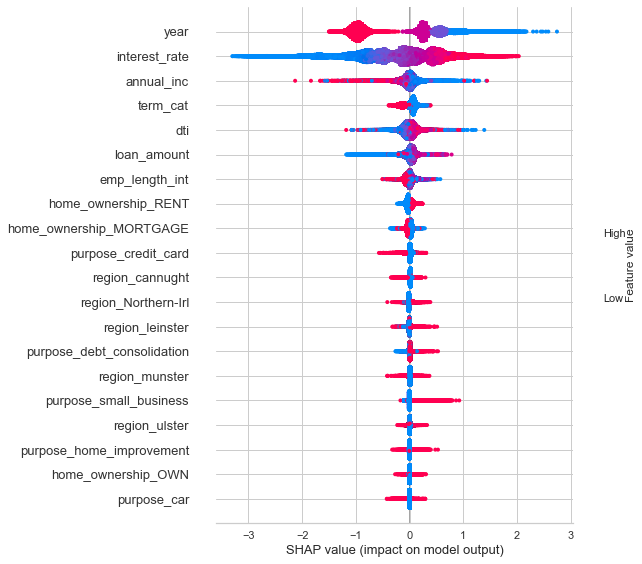

In [29]:
interpret_model(xgb)

In [ ]:
interpret_model(rf)

<a id='conclusion'></a>
### Conclusion
[Back to top](#back-to-top) <br>

With all the steps mentioned above, the following can be concluded: <br>
1) The bad loans are mainly influenced by:
    - Vintage of loan (recently approved loans tend to be good loans but as these loans age, bad loans starts to show)
    - Higher interest rate
    - Low Income
    - Shorter term period
    - Higher loan amount
 
2) Baseline model (XGB) is performing with Recall of 63%. This was achieved by adjusting class weights and tweaking the classification threshold to 10%. <br>

3) In line with these findings, the following are recommended:
    - Add new features relevant to each of the loan (historical transaction of customer)
    - Cluster customers based on the features available and use it as a new feature
    - Combine other classification models to improve Recall
    - Further optimize the classification threshold to improve Recall